In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df =pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:>

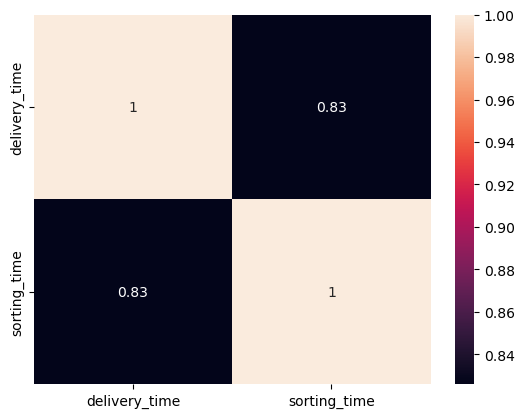

In [5]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='sorting_time', ylabel='Count'>

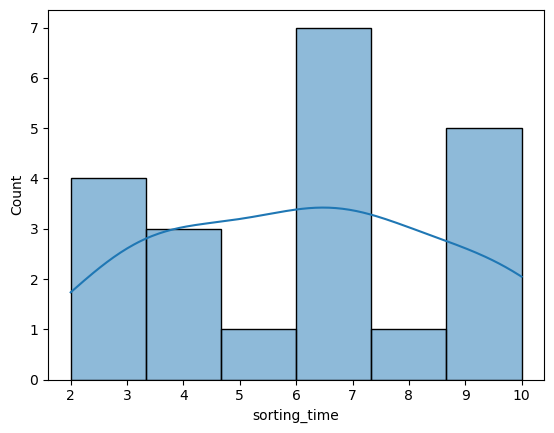

In [6]:
sns.histplot(data= df['sorting_time'],kde=True)

In [7]:
df['sorting_time'].skew()

0.047115474210530174

In [11]:
#Log Transformation
df['log_sortingtime'] = np.log(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_sortingtime
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [13]:
df['log_sortingtime'].skew()

-0.6052357185134765

<AxesSubplot:xlabel='log_sortingtime', ylabel='Count'>

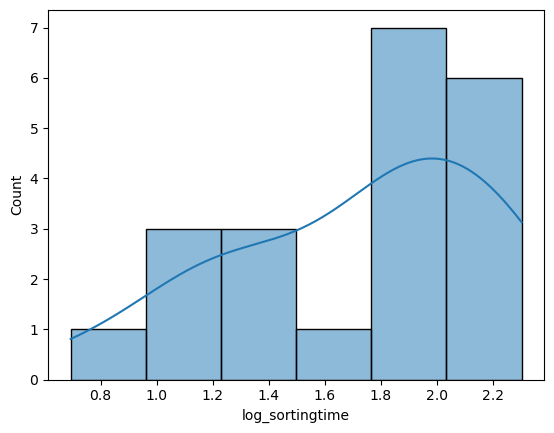

In [14]:
sns.histplot(data= df['log_sortingtime'],kde=True)

In [17]:
#sqrt transformation
df['sqrt_sortingtime'] = np.sqrt(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_sortingtime,sqrt_sortingtime
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


<AxesSubplot:xlabel='sqrt_sortingtime', ylabel='Count'>

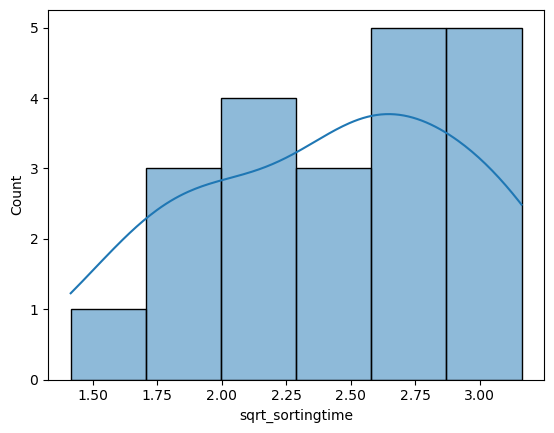

In [19]:
sns.histplot(data= df['sqrt_sortingtime'],kde=True)

In [18]:
df['sqrt_sortingtime'].skew()

-0.25981634723613994

In [20]:
#model
import statsmodels.formula.api as smf
df.head()

,delivery_time,sorting_time,log_sortingtime,sqrt_sortingtime
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278


In [37]:
#model1
model = smf.ols('delivery_time~sorting_time',data = df).fit()

In [38]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
model.rsquared ,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [40]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [41]:
#model2
model2  = smf.ols('delivery_time~ log_sortingtime', data=df).fit()

In [42]:
model2.rsquared, model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [29]:
model2.params

Intercept          1.159684
log_sortingtime    9.043413
dtype: float64

In [31]:
#model3
model3 = smf.ols('delivery_time~sqrt_sortingtime',data=df).fit()

In [36]:
model3.rsquared, model3.rsquared_adj

(0.695806227630867, 0.6797960290851232)

In [33]:
model3.params

Intercept          -2.518837
sqrt_sortingtime    7.936591
dtype: float64

# As we can see Simple linear Regression is performing best with Sqrt transformed data